In [3]:
!pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]━━━━ 1/2 [pandas]


In [5]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.8-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.8-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylin

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [8]:
# Load data
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_country = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

print(f"Fraud Data Shape: {fraud_data.shape}")
print(f"IP Country Shape: {ip_country.shape}")
print("\nFraud Data Info:")
print(fraud_data.info())
print(f"\nMissing Values:\n{fraud_data.isnull().sum()}")

Fraud Data Shape: (151112, 11)
IP Country Shape: (138846, 3)

Fraud Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser

In [9]:
# Data Cleaning
def clean_fraud_data(df):
    df_clean = df.copy()
    
    # Convert timestamps
    df_clean['signup_time'] = pd.to_datetime(df_clean['signup_time'])
    df_clean['purchase_time'] = pd.to_datetime(df_clean['purchase_time'])
    
    # Handle missing values
    print(f"Missing values before cleaning: {df_clean.isnull().sum().sum()}")
    
    # Remove duplicates
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {initial_rows - len(df_clean)} duplicate rows")
    
    # Basic statistics
    print(f"\nClass Distribution:")
    print(df_clean['class'].value_counts(normalize=True))
    
    return df_clean

fraud_clean = clean_fraud_data(fraud_data)

Missing values before cleaning: 0
Removed 0 duplicate rows

Class Distribution:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


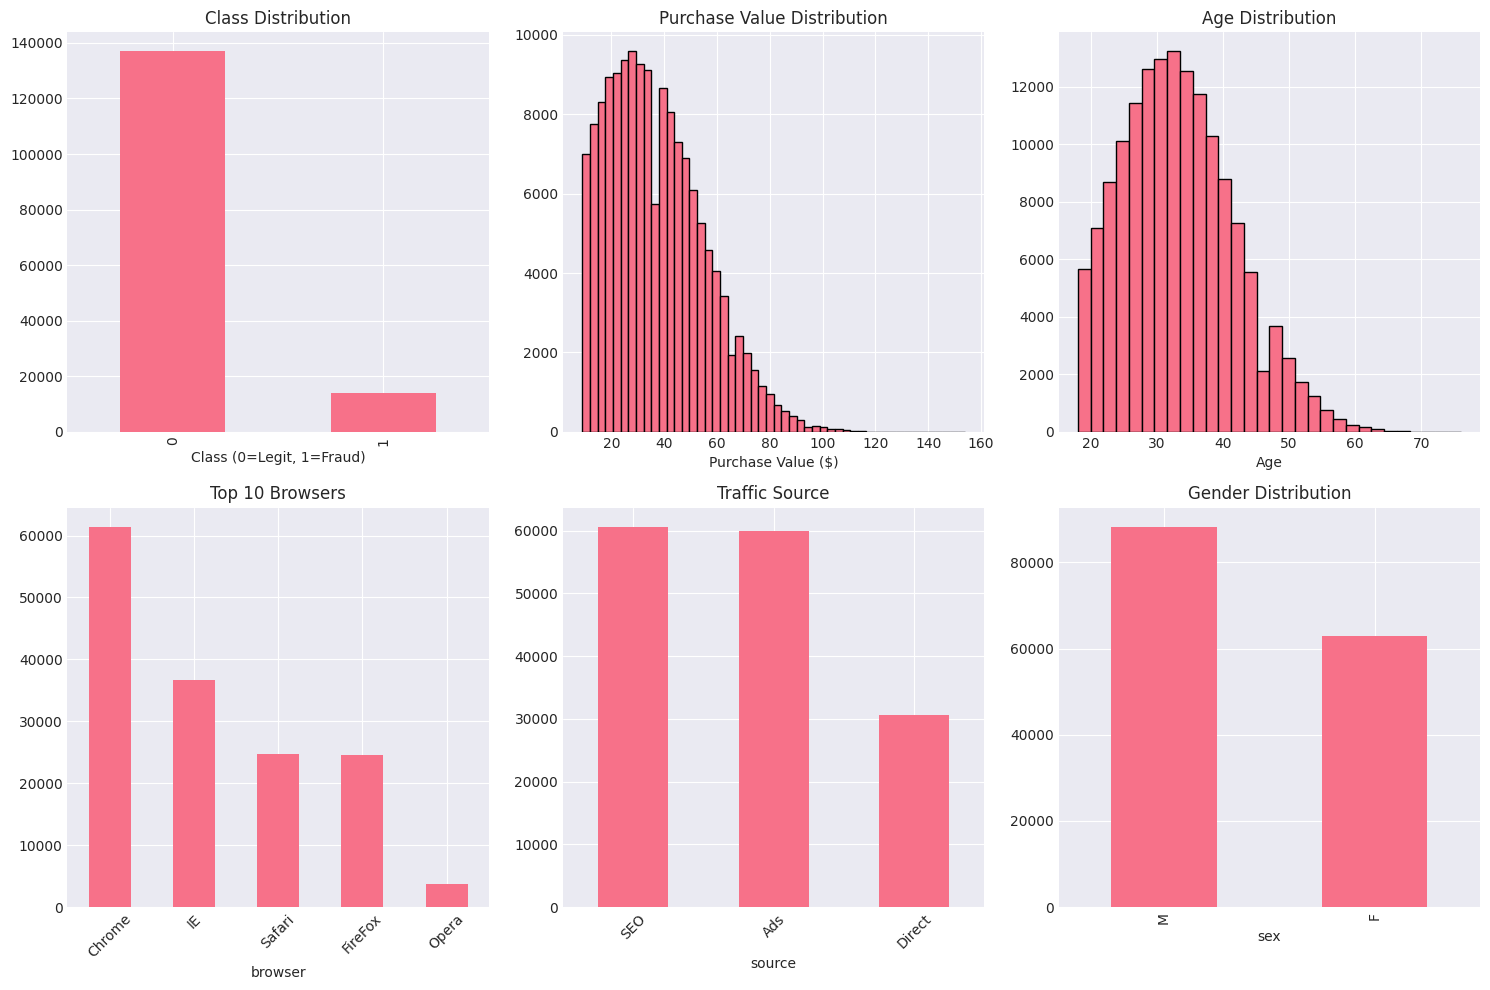

In [10]:
# EDA Visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Class distribution
fraud_clean['class'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Class Distribution')
axes[0,0].set_xlabel('Class (0=Legit, 1=Fraud)')

# Purchase value distribution
axes[0,1].hist(fraud_clean['purchase_value'], bins=50, edgecolor='black')
axes[0,1].set_title('Purchase Value Distribution')
axes[0,1].set_xlabel('Purchase Value ($)')

# Age distribution
axes[0,2].hist(fraud_clean['age'], bins=30, edgecolor='black')
axes[0,2].set_title('Age Distribution')
axes[0,2].set_xlabel('Age')

# Browser distribution
fraud_clean['browser'].value_counts().head(10).plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 10 Browsers')
axes[1,0].tick_params(axis='x', rotation=45)

# Source distribution
fraud_clean['source'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Traffic Source')
axes[1,1].tick_params(axis='x', rotation=45)

# Sex distribution
fraud_clean['sex'].value_counts().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Gender Distribution')

plt.tight_layout()
plt.savefig('../data/processed/fraud_eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

Mapping IP addresses to countries...
Valid IPs: 151112/151112
Error in merge_asof: incompatible merge keys [0] dtype('int64') and dtype('float64'), must be the same type

Mapped 151112 IPs to countries
Unknown countries: 151112

Top 10 countries by fraud rate:
Empty DataFrame
Columns: [total_transactions, fraud_rate]
Index: []


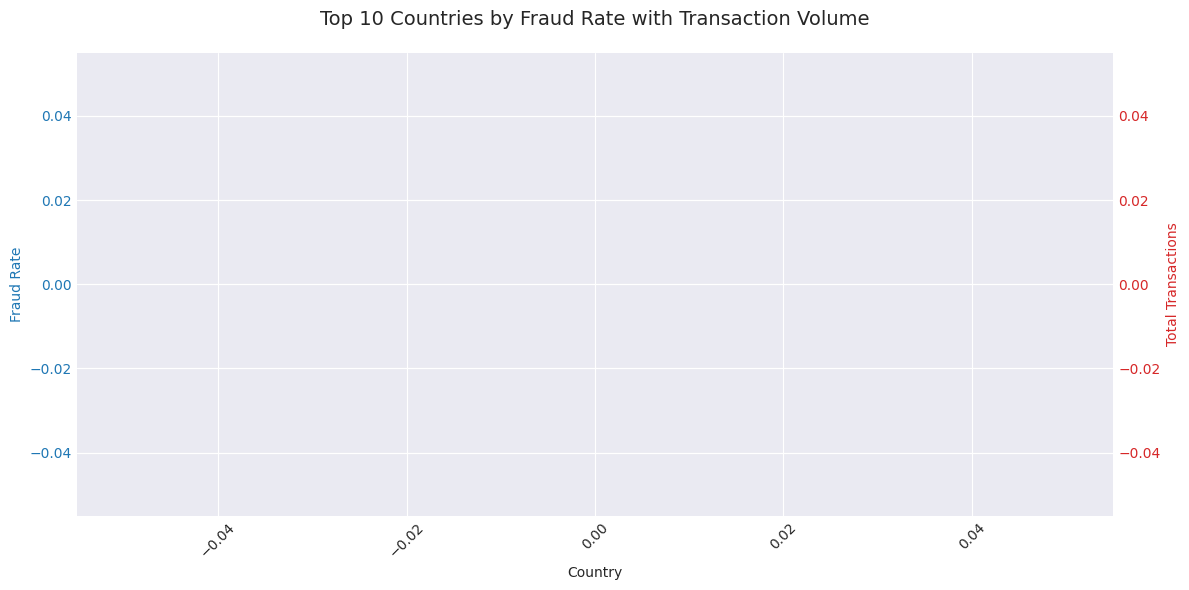

In [18]:
# Geolocation Integration
def ip_to_int(ip):
    """Convert IP address to integer for range lookup"""
    if pd.isna(ip):
        return None
    
    try:
        # Handle string IP addresses
        if isinstance(ip, str):
            octets = list(map(int, ip.split('.')))
            return (octets[0] << 24) + (octets[1] << 16) + (octets[2] << 8) + octets[3]
        # If it's already a number (some datasets store IPs as integers)
        elif isinstance(ip, (int, float)):
            return int(ip)
        else:
            return None
    except (ValueError, AttributeError):
        return None

def map_ip_to_country(transaction_df, ip_df):
    """Map IP addresses to countries using range lookup"""
    # Create a copy to avoid modifying original
    transaction_copy = transaction_df.copy()
    ip_copy = ip_df.copy()
    
    # Convert IPs to integers
    transaction_copy['ip_int'] = transaction_copy['ip_address'].apply(ip_to_int)
    
    # Remove rows with invalid IPs
    valid_ips = transaction_copy['ip_int'].notna()
    print(f"Valid IPs: {valid_ips.sum()}/{len(transaction_copy)}")
    
    if not valid_ips.any():
        print("No valid IP addresses found")
        transaction_copy['country'] = 'Unknown'
        return transaction_copy
    
    # Sort for merge_asof
    transaction_sorted = transaction_copy[valid_ips].sort_values('ip_int')
    ip_sorted = ip_copy.sort_values('lower_bound_ip_address')
    
    try:
        # Merge using pandas merge_asof for range lookup
        merged = pd.merge_asof(
            transaction_sorted,
            ip_sorted,
            left_on='ip_int',
            right_on='lower_bound_ip_address',
            direction='backward'
        )
        
        # Filter where ip falls within range
        within_range = (
            (merged['ip_int'] >= merged['lower_bound_ip_address']) & 
            (merged['ip_int'] <= merged['upper_bound_ip_address'])
        )
        
        # Assign countries
        merged.loc[within_range, 'country'] = merged.loc[within_range, 'country']
        merged.loc[~within_range, 'country'] = 'Unknown'
        
        # Merge back with rows that had invalid IPs
        invalid_ips = transaction_copy[~valid_ips].copy()
        invalid_ips['country'] = 'Unknown'
        invalid_ips['lower_bound_ip_address'] = None
        invalid_ips['upper_bound_ip_address'] = None
        
        result = pd.concat([merged, invalid_ips], ignore_index=True)
        
        return result
        
    except Exception as e:
        print(f"Error in merge_asof: {e}")
        transaction_copy['country'] = 'Unknown'
        return transaction_copy

# Apply mapping
print("Mapping IP addresses to countries...")
fraud_with_country = map_ip_to_country(fraud_clean, ip_country)

# Check results
print(f"\nMapped {fraud_with_country['country'].notna().sum()} IPs to countries")
print(f"Unknown countries: {(fraud_with_country['country'] == 'Unknown').sum()}")

# Analyze fraud by country
if 'country' in fraud_with_country.columns:
    fraud_by_country = fraud_with_country[fraud_with_country['country'] != 'Unknown'].groupby('country')['class'].agg(['count', 'mean'])
    fraud_by_country.columns = ['total_transactions', 'fraud_rate']
    fraud_by_country = fraud_by_country.sort_values('fraud_rate', ascending=False)
    
    print("\nTop 10 countries by fraud rate:")
    print(fraud_by_country.head(10))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    top_countries = fraud_by_country.head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_countries)))
    
    ax1 = plt.gca()
    ax1.bar(top_countries.index, top_countries['fraud_rate'], color=colors, alpha=0.7)
    ax1.set_xlabel('Country')
    ax1.set_ylabel('Fraud Rate', color='tab:blue')
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.plot(top_countries.index, top_countries['total_transactions'], 
             color='tab:red', marker='o', linewidth=2)
    ax2.set_ylabel('Total Transactions', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    plt.title('Top 10 Countries by Fraud Rate with Transaction Volume', fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig('../data/processed/fraud_by_country.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Country column not found in merged data")